# Data Science Essentials 4
**TN Med Helper** is a fictional company whose mission is to ensure access to healthcare for all Tennesseans. TN Med Helper has approached your data science consultancy for help identifying communities in Tennessee that need the most help in expanding access to healthcare.

In this project, we will use the [Medicare Disparities](https://data.cms.gov/mapping-medicare-disparities) data as a starting point for identifying such communities. Specifically, you will be provided with datasets containing the percent of Medicare beneficiaries who had an annual wellness visit (annual_wellness.csv), the number of all-cause hospitilizations per 1000 beneficiaries (hospitalizations.csv), and the number of emergency department visits per 1000 beneficiaries (emergency_department.csv). Over the next 8 weeks, you will work towards addressing the following three objectives.

First, TN Med Helper is concerned about communities either lacking access to healthcare or losing access to healthcare. They are looking to expand telehealth technologies into the vulnerable communities, and need your help to priortize areas most needing attention. your first objective is to identify which counties in Tennessee have the most severe lack of access to healthcare (either due to lack of hospitals, physicians, or both). Once you have identified these counties, see if you can find any common demographic or economic characteristics for these areas.

Second, TN Med Helper is interested in reducing the number of potentially preventable hospitalizations. Do areas that lack access to healthcare tend to have higher rates of emergency department visits or hospitalizations? Is there an association between the percentage of beneficiaries who had an annual wellness visit and rate of hospitalizations or emergency department visits?

Finally, TN Med Helper is trying to identify specific subpopulations to focus more attention on. Using data from [the Behavioral Risk Factor Surveillance System](https://www.cdc.gov/brfss/index.html), build a model to predict whether an individual has not had a checkup in the last year. Apply this model to the counties you identified above to predict how likely it is that the average person from those counties has not had a checkup in the last year. Which groups within these counties might need to be focused on to maximize the impact of TN Med Helper's efforts?

Over the course of this class, you will build up your data analysis skills and work towards answering these questions. At the end of the project, teams will present their findings to **TN Med Helper**.

### Looking at the data
- Annual wellness visits is a percentage (of beneficiaries).
- Emergency department visits is a number per 1000 beneficiaries.
- All-cause hospitalizations is number per 1000 beneficiaries.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hospitalizations = pd.read_csv("../data/Medicare_Disparities_by_Population/hospitalizations.csv")
hospitalizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 3222 non-null   int64 
 1   geography            3222 non-null   object
 2   measure              3222 non-null   object
 3   adjustment           3222 non-null   object
 4   analysis             3222 non-null   object
 5   domain               3222 non-null   object
 6   condition            3222 non-null   object
 7   primary_sex          3222 non-null   object
 8   primary_age          3222 non-null   object
 9   primary_dual         3222 non-null   object
 10  fips                 3222 non-null   int64 
 11  county               3205 non-null   object
 12  state                3222 non-null   object
 13  urban                3222 non-null   object
 14  primary_race         3222 non-null   object
 15  primary_eligibility  3222 non-null   object
 16  primar

In [3]:
annual_wellness = pd.read_csv("../data/Medicare_Disparities_by_Population/annual_wellness.csv")
annual_wellness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 3220 non-null   int64 
 1   geography            3220 non-null   object
 2   measure              3220 non-null   object
 3   adjustment           3220 non-null   object
 4   analysis             3220 non-null   object
 5   domain               3220 non-null   object
 6   condition            3220 non-null   object
 7   primary_sex          3220 non-null   object
 8   primary_age          3220 non-null   object
 9   primary_dual         3220 non-null   object
 10  fips                 3220 non-null   int64 
 11  county               3205 non-null   object
 12  state                3220 non-null   object
 13  urban                3220 non-null   object
 14  primary_race         3220 non-null   object
 15  primary_eligibility  3220 non-null   object
 16  primar

In [4]:
emergency_department = pd.read_csv("../data/Medicare_Disparities_by_Population/emergency_department.csv")
emergency_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 3220 non-null   int64 
 1   geography            3220 non-null   object
 2   measure              3220 non-null   object
 3   adjustment           3220 non-null   object
 4   analysis             3220 non-null   object
 5   domain               3220 non-null   object
 6   condition            3220 non-null   object
 7   primary_sex          3220 non-null   object
 8   primary_age          3220 non-null   object
 9   primary_dual         3220 non-null   object
 10  fips                 3220 non-null   int64 
 11  county               3205 non-null   object
 12  state                3220 non-null   object
 13  urban                3220 non-null   object
 14  primary_race         3220 non-null   object
 15  primary_eligibility  3220 non-null   object
 16  primar

All three data structures are the same, with the same column names (unfortunately). I will merge them, and rename the columns that I want to keep from each.

In [5]:
emergency_department.iloc[1] == hospitalizations.iloc[1]

year                    True
geography               True
measure                False
adjustment              True
analysis                True
domain                  True
condition              False
primary_sex             True
primary_age             True
primary_dual            True
fips                    True
county                  True
state                   True
urban                   True
primary_race            True
primary_eligibility     True
primary_denominator    False
analysis_value         False
Name: 1, dtype: bool

In [6]:
emer_dict = {}
for i in emergency_department:
    emer_dict[i] = set(emergency_department[i])

In [7]:
emer_dict['fips'] = []
emer_dict['county'] = []
emer_dict['state'] = []
emer_dict['analysis_value'] = []
emer_dict

{'year': {2019},
 'geography': {'County'},
 'measure': {'Emergency department visit rate'},
 'adjustment': {'Unsmoothed actual'},
 'analysis': {'Base measure'},
 'domain': {'Primary chronic conditions'},
 'condition': {'All Emergency Department Visits'},
 'primary_sex': {'All'},
 'primary_age': {'All'},
 'primary_dual': {'Dual & non-dual'},
 'fips': [],
 'county': [],
 'state': [],
 'urban': {'Rural', 'Urban'},
 'primary_race': {'All'},
 'primary_eligibility': {'All'},
 'primary_denominator': {'undefined'},
 'analysis_value': []}

The comparison above shows which columns are unique to each dataframe: measure, condition, primary_denominator, and analysis_value. All other columns except urban only have one value.

In [8]:
hospitalizations = hospitalizations[['fips','measure','primary_denominator', 'analysis_value']]
emergency_department = emergency_department[['fips','measure','primary_denominator', 'analysis_value']]

In [9]:
hospitalizations.columns = ['fips','measure_hosp','primary_denominator_hosp', 'analysis_value_hosp']
emergency_department.columns = ['fips','measure_emer','primary_denominator_emer', 'analysis_value_emer']


In [10]:
annual_wellness.columns = annual_wellness.columns.str.replace("analysis_value","analysis_value_well")
annual_wellness.columns = annual_wellness.columns.str.replace("measure","measure_well")
annual_wellness.columns = annual_wellness.columns.str.replace("primary_denominator","primary_denominator_well")

In [11]:
disparities = pd.merge(left = annual_wellness, left_on = 'fips',
         right = hospitalizations, right_on = 'fips')

In [12]:
disparities = pd.merge(left = disparities, left_on = 'fips',
         right = emergency_department, right_on = 'fips')

In [13]:
disparities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3219
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      3220 non-null   int64 
 1   geography                 3220 non-null   object
 2   measure_well              3220 non-null   object
 3   adjustment                3220 non-null   object
 4   analysis                  3220 non-null   object
 5   domain                    3220 non-null   object
 6   condition                 3220 non-null   object
 7   primary_sex               3220 non-null   object
 8   primary_age               3220 non-null   object
 9   primary_dual              3220 non-null   object
 10  fips                      3220 non-null   int64 
 11  county                    3205 non-null   object
 12  state                     3220 non-null   object
 13  urban                     3220 non-null   object
 14  primary_race            

In [14]:
print(set(disparities.adjustment),set(disparities.analysis),set(disparities.domain),set(disparities.condition))

{'Unsmoothed actual'} {'Base measure'} {'Preventive Services'} {'Annual Wellness Visit'}


Each of the columns above only has one value, so I am going to remove them.

In [15]:
disparities = disparities.drop(['adjustment','analysis','domain','condition'], axis = 1)
disparities.head(2)

,year,geography,measure_well,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator_well,analysis_value_well,measure_hosp,primary_denominator_hosp,analysis_value_hosp,measure_emer,primary_denominator_emer,analysis_value_emer
0,2019,County,Preventive Services,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,"1,000-4,999",29,Hospitalization,"5,000-9,999",299,Emergency department visit rate,undefined,723
1,2019,County,Preventive Services,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,"10,000+",29,Hospitalization,"10,000+",268,Emergency department visit rate,undefined,601


Lastly, I will narrow down the list to only counties in TN.

In [16]:
disparities = disparities.loc[disparities.state == 'TENNESSEE']

In [17]:
disparities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 2428 to 2522
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      95 non-null     int64 
 1   geography                 95 non-null     object
 2   measure_well              95 non-null     object
 3   primary_sex               95 non-null     object
 4   primary_age               95 non-null     object
 5   primary_dual              95 non-null     object
 6   fips                      95 non-null     int64 
 7   county                    95 non-null     object
 8   state                     95 non-null     object
 9   urban                     95 non-null     object
 10  primary_race              95 non-null     object
 11  primary_eligibility       95 non-null     object
 12  primary_denominator_well  95 non-null     object
 13  analysis_value_well       95 non-null     int64 
 14  measure_hosp           

As before, we have all 95 counties in TN.

## Question 1: Identify which counties in TN have the most severe lack of access to healthcare.

### Which counties have low numbers of physicians?

In [18]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

In [19]:
physicians = physicians.loc[physicians.state == 'Tennessee']
physicians.shape

(95, 4)

In [20]:
population = pd.read_csv('../data/population_by_county.csv')
population.head()

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


In [21]:
physicians = pd.merge(left = physicians, right = population[['FIPS','population','urban']], left_on='FIPS', right_on = 'FIPS')

In [22]:
physicians['urban'].value_counts()

Rural    57
Urban    38
Name: urban, dtype: int64

In [23]:
physicians.loc[physicians.population/physicians.primary_care_physicians < 1500,'supply'] = 'adequate'
physicians.loc[(physicians.population/physicians.primary_care_physicians > 1500) &
               (physicians.population/physicians.primary_care_physicians < 3500),'supply'] = 'moderately adequate'
physicians.loc[physicians.population/physicians.primary_care_physicians > 3500,'supply'] = 'low inadequate'

In [24]:
physicians = physicians.rename({'supply':'shadac_category'}, axis = 'columns')

Text(0.5, 1.0, 'SHADAC Category by Type of County')

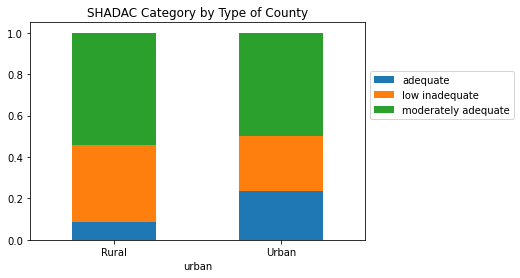

In [25]:
import matplotlib.pyplot as plt
pd.crosstab(physicians.urban, physicians.shadac_category, normalize='index').plot(kind = 'bar', stacked = True)
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');   # move the legend to the right side of the plot
plt.title("SHADAC Category by Type of County")

In [26]:
physicians

,FIPS,state,county,primary_care_physicians,population,urban,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,moderately adequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,moderately adequate
2,47005,Tennessee,Benton,3.0,16140,Rural,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,adequate
...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,moderately adequate
91,47183,Tennessee,Weakley,18.0,33510,Rural,moderately adequate
92,47185,Tennessee,White,9.0,26800,Rural,moderately adequate
93,47187,Tennessee,Williamson,338.0,225389,Urban,adequate


In [27]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [28]:
unemployment.Name = unemployment.Name.str.split(' County, TN', expand = True)[0]

In [29]:
physicians = pd.merge(left=unemployment[['laus_code','Name','Employed','Unemployed','unemployment_rate']], left_on='Name',
        right = physicians[['FIPS','county','primary_care_physicians','population','urban','shadac_category']], right_on='county')

In [30]:
physicians

,laus_code,Name,Employed,Unemployed,unemployment_rate,FIPS,county,primary_care_physicians,population,urban,shadac_category
0,CN4700100000000,Anderson,33010,1694,4.9,47001,Anderson,39.0,76061,Urban,moderately adequate
1,CN4700300000000,Bedford,19550,1073,5.2,47003,Bedford,15.0,48292,Rural,moderately adequate
2,CN4700500000000,Benton,6305,418,6.2,47005,Benton,3.0,16140,Rural,low inadequate
3,CN4700700000000,Bledsoe,3947,305,7.2,47007,Bledsoe,1.0,14836,Rural,low inadequate
4,CN4700900000000,Blount,61119,2979,4.6,47009,Blount,90.0,129927,Urban,adequate
...,...,...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,Wayne,6074,342,5.3,47181,Wayne,5.0,16693,Rural,moderately adequate
91,CN4718300000000,Weakley,14783,711,4.6,47183,Weakley,18.0,33510,Rural,moderately adequate
92,CN4718500000000,White,11484,601,5.0,47185,White,9.0,26800,Rural,moderately adequate
93,CN4718700000000,Williamson,125213,4271,3.3,47187,Williamson,338.0,225389,Urban,adequate


/Users/smgroves/Documents/anaconda3/envs/geo_dse/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Unemployment by Type of County')

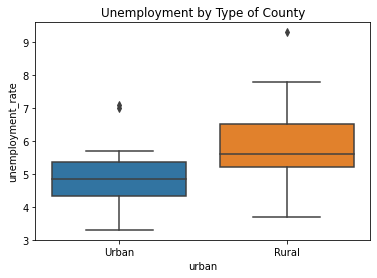

In [31]:
import seaborn as sns
sns.boxplot(physicians.urban,physicians.unemployment_rate)
plt.xticks(rotation = 0)
plt.title("Unemployment by Type of County")

In [32]:
physicians['pcp_per_100k'] = physicians.primary_care_physicians/physicians.population*100000

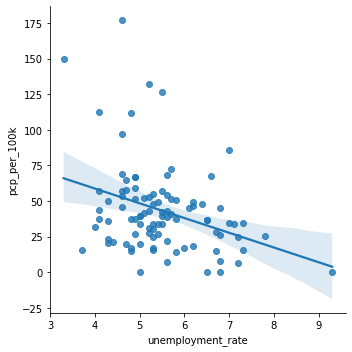

In [33]:
sns.lmplot(data = physicians, y = 'pcp_per_100k', x = 'unemployment_rate')
plt.ylabel = "PCP per 100k residents"
plt.xlabel = "Unemployment Rate"

In [34]:
physicians[['unemployment_rate', 'pcp_per_100k']].corr()

,unemployment_rate,pcp_per_100k
unemployment_rate,1.000000,-0.335333
pcp_per_100k,-0.335333,1.000000


In [35]:
disparities = pd.merge(left = disparities, left_on = 'fips',
         right = physicians, right_on = 'FIPS')

Now get rid of repetitive columns:

In [36]:
disparities.head(2)

,year,geography,measure_well,primary_sex,primary_age,primary_dual,fips,county_x,state,urban_x,...,Employed,Unemployed,unemployment_rate,FIPS,county_y,primary_care_physicians,population,urban_y,shadac_category,pcp_per_100k
0,2019,County,Preventive Services,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,...,33010,1694,4.9,47001,Anderson,39.0,76061,Urban,moderately adequate,51.274635
1,2019,County,Preventive Services,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,...,19550,1073,5.2,47003,Bedford,15.0,48292,Rural,moderately adequate,31.061045


In [37]:
disparities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      95 non-null     int64  
 1   geography                 95 non-null     object 
 2   measure_well              95 non-null     object 
 3   primary_sex               95 non-null     object 
 4   primary_age               95 non-null     object 
 5   primary_dual              95 non-null     object 
 6   fips                      95 non-null     int64  
 7   county_x                  95 non-null     object 
 8   state                     95 non-null     object 
 9   urban_x                   95 non-null     object 
 10  primary_race              95 non-null     object 
 11  primary_eligibility       95 non-null     object 
 12  primary_denominator_well  95 non-null     object 
 13  analysis_value_well       95 non-null     int64  
 14  measure_hosp

In [38]:
disparities = disparities.drop(['geography','county_x','urban_x', 'fips'], axis = 1)
disparities.index = disparities.FIPS
disparities.columns = disparities.columns.str.replace('county_y', 'county')

In [39]:
disparities.columns = disparities.columns.str.replace('urban_y', 'urban')

In [40]:
print(set(disparities.measure_well),set(disparities.measure_emer),set(disparities.measure_hosp))

{'Preventive Services'} {'Emergency department visit rate'} {'Hospitalization'}


In [41]:
disparities = disparities.drop(['measure_well','measure_emer','measure_hosp'], axis = 1)


In [42]:
disparities.iloc[0]

year                                       2019
primary_sex                                 All
primary_age                                 All
primary_dual                    Dual & non-dual
state                                 TENNESSEE
primary_race                                All
primary_eligibility                         All
primary_denominator_well            5,000-9,999
analysis_value_well                          35
primary_denominator_hosp                10,000+
analysis_value_hosp                         267
primary_denominator_emer              undefined
analysis_value_emer                         617
laus_code                       CN4700100000000
Name                                   Anderson
Employed                                  33010
Unemployed                                 1694
unemployment_rate                           4.9
FIPS                                      47001
county                                 Anderson
primary_care_physicians                 

In [43]:
disparities.to_csv("../data/disparities.csv")

## Analyzing disparities in access: physicians

In [44]:
disparities = pd.read_csv('../data/disparities.csv', index_col = 0)

In [45]:
hospitals = pd.read_csv('../data/Hospitals.csv')
hospitals = hospitals.loc[hospitals.STATE =='TN']
hospitals.COUNTYFIPS = pd.to_numeric(hospitals['COUNTYFIPS'])

In [46]:
disparities.corr().style.background_gradient('viridis')

/Users/smgroves/Documents/anaconda3/envs/geo_dse/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/smgroves/Documents/anaconda3/envs/geo_dse/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,year,analysis_value_well,analysis_value_hosp,analysis_value_emer,Employed,Unemployed,unemployment_rate,FIPS.1,primary_care_physicians,population,pcp_per_100k
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
analysis_value_well,nan,1.000000,-0.480732,-0.480607,0.288357,0.221078,-0.325228,0.032489,0.319609,0.281995,0.488941
analysis_value_hosp,nan,-0.480732,1.000000,0.599412,-0.093001,-0.049513,0.275980,0.085773,-0.121397,-0.091323,-0.308934
analysis_value_emer,nan,-0.480607,0.599412,1.000000,-0.179994,-0.121924,0.484027,-0.044881,-0.202044,-0.172820,-0.396181
Employed,nan,0.288357,-0.093001,-0.179994,1.000000,0.965032,-0.196023,0.089982,0.961056,0.992966,0.502287
Unemployed,nan,0.221078,-0.049513,-0.121924,0.965032,1.000000,-0.077655,0.091267,0.934610,0.985295,0.432351
unemployment_rate,nan,-0.325228,0.275980,0.484027,-0.196023,-0.077655,1.000000,-0.104688,-0.159979,-0.156259,-0.335333
FIPS.1,nan,0.032489,0.085773,-0.044881,0.089982,0.091267,-0.104688,1.000000,0.093030,0.091808,0.103152
primary_care_physicians,nan,0.319609,-0.121397,-0.202044,0.961056,0.934610,-0.159979,0.093030,1.000000,0.964170,0.624601
population,nan,0.281995,-0.091323,-0.172820,0.992966,0.985295,-0.156259,0.091808,0.964170,1.000000,0.501609


In [47]:
disparities.columns

Index(['year', 'primary_sex', 'primary_age', 'primary_dual', 'state',
       'primary_race', 'primary_eligibility', 'primary_denominator_well',
       'analysis_value_well', 'primary_denominator_hosp',
       'analysis_value_hosp', 'primary_denominator_emer',
       'analysis_value_emer', 'laus_code', 'Name', 'Employed', 'Unemployed',
       'unemployment_rate', 'FIPS.1', 'county', 'primary_care_physicians',
       'population', 'urban', 'shadac_category', 'pcp_per_100k'],
      dtype='object')

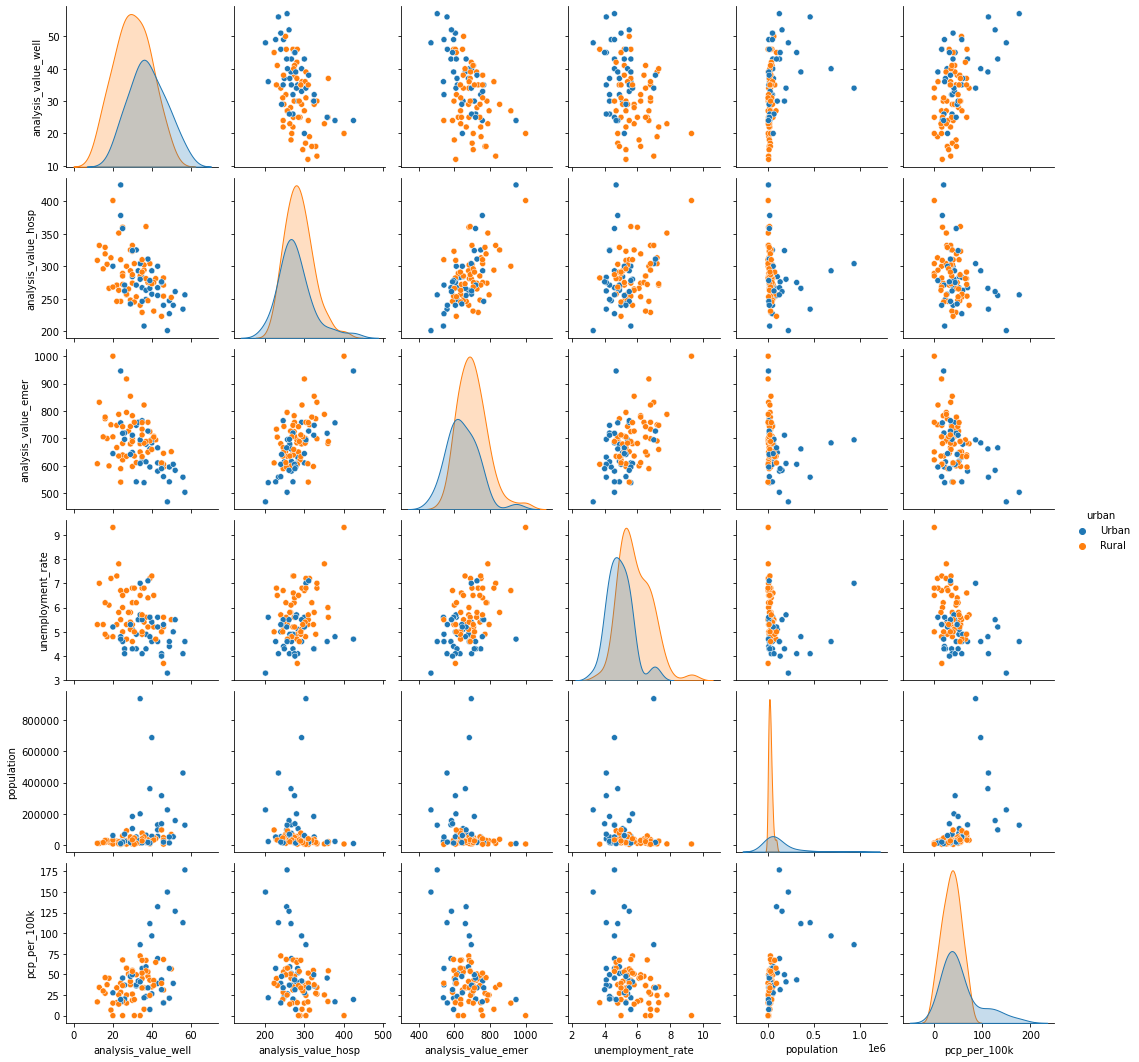

In [48]:
import seaborn as sns
sns.pairplot(disparities[['analysis_value_well', 
                          'analysis_value_hosp', 
                          'analysis_value_emer',
                          'unemployment_rate',
                          'population',
                          'pcp_per_100k','urban'
                         ]], hue = 'urban')

First, we will look at primary care physicians by county. We already did this, so we will summarize in plots below.

/Users/smgroves/Documents/anaconda3/envs/geo_dse/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shadac_category', ylabel='pcp_per_100k'>

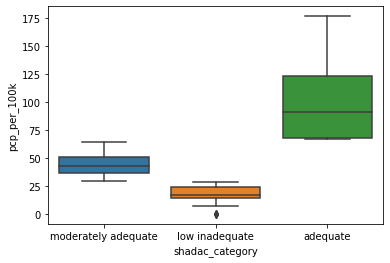

In [49]:
sns.boxplot(disparities.shadac_category, disparities.pcp_per_100k)

In [50]:
disparities.shadac_category.value_counts()

moderately adequate    50
low inadequate         31
adequate               14
Name: shadac_category, dtype: int64

There are 31 counties considered low inadequate (>3500 residents per physician).

In [51]:
low_shadac = disparities.loc[disparities.shadac_category == 'low inadequate']

In [52]:
low_shadac.sort_values('pcp_per_100k').head(10)

,year,primary_sex,primary_age,primary_dual,state,primary_race,primary_eligibility,primary_denominator_well,analysis_value_well,primary_denominator_hosp,...,Employed,Unemployed,unemployment_rate,FIPS.1,county,primary_care_physicians,population,urban,shadac_category,pcp_per_100k
FIPS,,,,,,,,,,,,,,,,,,,,,
47175,2019,All,All,Dual & non-dual,TENNESSEE,All,All,500-999,31,500-999,...,1884,137,6.8,47175,Van Buren,0.0,5760,Rural,low inadequate,0.000000
47033,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",25,"1,000-4,999",...,6494,344,5.0,47033,Crockett,0.0,14399,Rural,low inadequate,0.000000
47061,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",34,"1,000-4,999",...,4655,322,6.5,47061,Grundy,0.0,13344,Rural,low inadequate,0.000000
47095,2019,All,All,Dual & non-dual,TENNESSEE,All,All,500-999,20,"1,000-4,999",...,1537,157,9.3,47095,Lake,0.0,7401,Rural,low inadequate,0.000000
47007,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",19,"1,000-4,999",...,3947,305,7.2,47007,Bledsoe,1.0,14836,Rural,low inadequate,6.740361
47161,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",39,"1,000-4,999",...,5146,305,5.6,47161,Stewart,1.0,13427,Urban,low inadequate,7.447680
47097,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",36,"1,000-4,999",...,9075,658,6.8,47097,Lauderdale,2.0,25989,Rural,low inadequate,7.695564
47129,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",23,"1,000-4,999",...,7327,455,5.8,47129,Morgan,3.0,21545,Rural,low inadequate,13.924344
47117,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",20,"1,000-4,999",...,14422,735,4.8,47117,Marshall,5.0,32965,Rural,low inadequate,15.167602


<div class="alert alert-block alert-info" >
    There are 31 counties with low access to physicians, by SHADAC category.
<b>In particular, 4 counties have 0 physicians: Van Buren, Crockett, Grundy, and Lake.<b> All four are rural, though Crockett and Grundy have almost 15,000 residents.
    </div>

### Analyzing disparities in access: hospitals

We would like to add hospitals per 100K residents for each county to disparities. To do this, we need to get hospitals.COUNTY and disparities.county in the same format, and then we can add up the # of hospitals (plus associated variables) for each county by population.

In [53]:
hospitals.iloc[0]

X                                           -9409026.0792
Y                                            4210878.1252
OBJECTID                                              517
ID                                               14737331
NAME                 STARR REGIONAL MEDICAL CENTER ETOWAH
ADDRESS                             886 HIGHWAY 411 NORTH
CITY                                               ETOWAH
STATE                                                  TN
ZIP                                                 37331
ZIP4                                        NOT AVAILABLE
TELEPHONE                                  (423) 263-3600
TYPE                                   GENERAL ACUTE CARE
STATUS                                               OPEN
POPULATION                                             72
COUNTY                                             MCMINN
COUNTYFIPS                                          47107
COUNTRY                                               USA
LATITUDE      

In [54]:
hospitals.COUNTYFIPS.value_counts()

47157    23
47037    15
47065    13
47093    11
47179     7
         ..
47019     1
47177     1
47027     1
47159     1
47181     1
Name: COUNTYFIPS, Length: 80, dtype: int64

In [55]:
for i in range(len(hospitals.COUNTYFIPS.value_counts())):
    ind = (hospitals.COUNTYFIPS.value_counts().index[i])
    count = (hospitals.COUNTYFIPS.value_counts()[ind])
    disparities.loc[ind, 'num_hospitals'] = count

However, some of these hospitals are closed.

In [56]:
set(hospitals.STATUS)

{'CLOSED', 'OPEN'}

In [57]:
hospitals.groupby('COUNTYFIPS').STATUS.value_counts()

COUNTYFIPS  STATUS
47001       OPEN      1
47003       CLOSED    1
            OPEN      1
47005       OPEN      1
47007       OPEN      1
                     ..
47181       OPEN      1
47183       OPEN      2
47185       OPEN      1
47187       OPEN      2
47189       OPEN      2
Name: STATUS, Length: 89, dtype: int64

In [58]:
for i in range(len(hospitals.loc[hospitals.STATUS == 'OPEN'].COUNTYFIPS.value_counts())):
    ind = (hospitals.loc[hospitals.STATUS == 'OPEN'].COUNTYFIPS.value_counts().index[i])
    count = (hospitals.loc[hospitals.STATUS == 'OPEN'].COUNTYFIPS.value_counts()[ind])
    disparities.loc[ind, 'num_hospitals_open'] = count

In [59]:
disparities

,year,primary_sex,primary_age,primary_dual,state,primary_race,primary_eligibility,primary_denominator_well,analysis_value_well,primary_denominator_hosp,...,unemployment_rate,FIPS.1,county,primary_care_physicians,population,urban,shadac_category,pcp_per_100k,num_hospitals,num_hospitals_open
FIPS,,,,,,,,,,,,,,,,,,,,,
47001,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"5,000-9,999",35,"10,000+",...,4.9,47001,Anderson,39.0,76061,Urban,moderately adequate,51.274635,1.0,1.0
47003,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",46,"5,000-9,999",...,5.2,47003,Bedford,15.0,48292,Rural,moderately adequate,31.061045,2.0,1.0
47005,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",30,"1,000-4,999",...,6.2,47005,Benton,3.0,16140,Rural,low inadequate,18.587361,1.0,1.0
47007,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",19,"1,000-4,999",...,7.2,47007,Bledsoe,1.0,14836,Rural,low inadequate,6.740361,1.0,1.0
47009,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"10,000+",43,"10,000+",...,4.6,47009,Blount,90.0,129927,Urban,adequate,69.269667,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47181,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",15,"1,000-4,999",...,5.3,47181,Wayne,5.0,16693,Rural,moderately adequate,29.952675,1.0,1.0
47183,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",30,"5,000-9,999",...,4.6,47183,Weakley,18.0,33510,Rural,moderately adequate,53.715309,2.0,2.0
47185,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",35,"5,000-9,999",...,5.0,47185,White,9.0,26800,Rural,moderately adequate,33.582090,1.0,1.0


<AxesSubplot:xlabel='pcp_per_100k', ylabel='num_hospitals_open'>

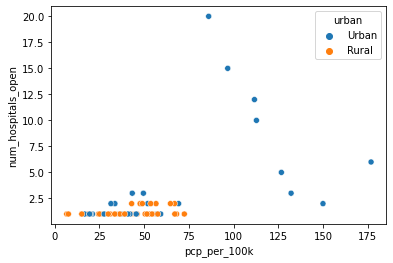

In [60]:
sns.scatterplot(data = disparities, x = 'pcp_per_100k', y = 'num_hospitals_open', hue = 'urban')

In [61]:
disparities = disparities.fillna(0)

In [62]:
disparities.loc[(disparities.pcp_per_100k < 15) &
                (disparities.num_hospitals_open < 2 )]['county']

FIPS
47007       Bledsoe
47033      Crockett
47061        Grundy
47095          Lake
47097    Lauderdale
47129        Morgan
47161       Stewart
47175     Van Buren
Name: county, dtype: object

<div class="alert alert-block alert-info">
    The counties above are the ones with fewer than 2 open hospitals and fewer than 15 pcp per 100k

Lastly, we can take a look at number of beds. We need to fillna (-999) with 0 so it doesn't mess up the counts.

In [63]:
hospitals.BEDS = hospitals.BEDS.replace(-999,0)

In [64]:
for i in range(len(hospitals.loc[hospitals.STATUS == 'OPEN'].COUNTYFIPS.value_counts())):
    ind = (hospitals.loc[hospitals.STATUS == 'OPEN'].COUNTYFIPS.value_counts().index[i])
    count = (hospitals.loc[hospitals.STATUS == 'OPEN'].groupby('COUNTYFIPS').BEDS.mean()[ind])
    disparities.loc[ind, 'mean_beds'] = count

In [65]:
for i in range(len(hospitals.loc[hospitals.STATUS == 'OPEN'].COUNTYFIPS.value_counts())):
    ind = (hospitals.loc[hospitals.STATUS == 'OPEN'].COUNTYFIPS.value_counts().index[i])
    count = (hospitals.loc[hospitals.STATUS == 'OPEN'].groupby('COUNTYFIPS').BEDS.sum()[ind])
    disparities.loc[ind, 'num_beds'] = count


In [66]:
disparities.num_beds = disparities.num_beds.fillna(0)

<AxesSubplot:xlabel='num_hospitals_open', ylabel='num_beds'>

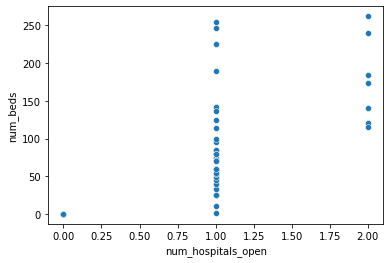

In [67]:
sns.scatterplot(data = disparities.loc[disparities.urban == 'Rural'], x = 'num_hospitals_open', y = 'num_beds')#, hue = 'urban')

<AxesSubplot:xlabel='pcp_per_100k', ylabel='num_beds'>

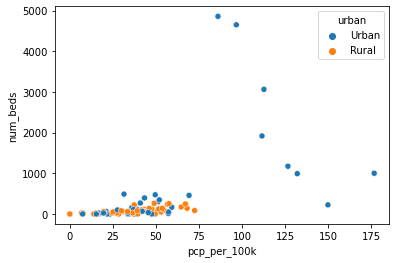

In [68]:
sns.scatterplot(data = disparities, x = 'pcp_per_100k', y = 'num_beds', hue = 'urban')

In [69]:
disparities.to_csv('../data/disparities.csv')

### Plotting disparities

In [70]:
median_income = pd.read_excel('../data/est18all.xls',
              sheet_name = 'est18ALL',
             header = 3,
             usecols = 'C,D,W')

In [71]:
median_income.head(2)

,Postal Code,Name,Median Household Income
0,US,United States,61937
1,AL,Alabama,49881


For this map, we only need the counties located in Tennessee.

In [72]:
median_income = median_income.loc[median_income['Postal Code'] == 'TN']
median_income.head(2)

,Postal Code,Name,Median Household Income
2471,TN,Tennessee,52366
2472,TN,Anderson County,50672


We can remove the first row.

In [73]:
median_income = median_income.iloc[1:]
median_income.head(2)

,Postal Code,Name,Median Household Income
2472,TN,Anderson County,50672
2473,TN,Bedford County,49860


Now, let's read in our counties shapefiles. This one was obtained from http://www.tngis.org/administrative-boundaries.htm

This creates a geopandas DataFrame, which is like a pandas DataFrame, but has geometry associated with it.

In [74]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [75]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


In [76]:
median_income['NAME'] = median_income['Name'].str[:-7]
counties = pd.merge(left = counties,
                    right = median_income[['NAME', 'Median Household Income']])
counties['Median Household Income'] = pd.to_numeric(counties['Median Household Income'])

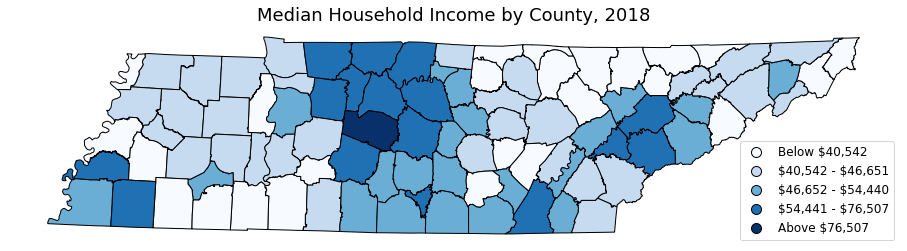

In [77]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'Median Household Income', 
              edgecolor = 'black',
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)

leg = ax.get_legend()

# Adjust the formatting of the legend
labels = []
n = len(leg.get_texts())
for i, lbl in enumerate(leg.get_texts()):
    label_text = lbl.get_text()
    lower = float(label_text.split()[0][:-1])
    upper = float(label_text.split()[1][:-1])
    if i == 0:
        new_text = "Below " + "\${:,.0f}".format(upper + 1)
    elif i == n - 1:
        new_text = "Above " + "\${:,.0f}".format(lower)
    else:
        new_text = "\${:,.0f}".format(lower + 1) + " - " + "\${:,.0f}".format(upper)
        
    labels.append(new_text)

# Adjust the marker appearance
# Extract the old markers and then modify by setting the edgecolor and edgewidth
markers = []
for line in leg.get_lines():
    marker = Line2D([0],[0], marker = 'o', 
                    markersize = line.get_markersize(), 
                    color = line.get_markerfacecolor(),
                    linestyle = 'None',
                    markeredgecolor = 'black',
                    markeredgewidth = 1)
    markers.append(marker)

# Redraw the legend with the new labels and markers
plt.legend(markers, labels, fontsize = 12)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
    
plt.title('Median Household Income by County, 2018', fontsize = 18)

ax.axis('off');

In [78]:
counties = pd.merge(left = counties, left_on = 'NAME',
         right = disparities, right_on = 'county')

In [79]:
counties

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,Median Household Income,year,primary_sex,primary_age,...,county,primary_care_physicians,population,urban,shadac_category,pcp_per_100k,num_hospitals,num_hospitals_open,mean_beds,num_beds
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",47508,2019,All,All,...,Chester,4.0,17190,Urban,low inadequate,23.269343,0.0,0.0,NaN,0.0
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",38879,2019,All,All,...,Wayne,5.0,16693,Rural,moderately adequate,29.952675,1.0,1.0,80.0,80.0
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",60874,2019,All,All,...,Tipton,17.0,61447,Urban,low inadequate,27.666119,1.0,1.0,100.0,100.0
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",57196,2019,All,All,...,Hamilton,403.0,360919,Urban,adequate,111.659403,13.0,12.0,160.0,1920.0
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",46565,2019,All,All,...,Stewart,1.0,13427,Urban,low inadequate,7.447680,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,McNairy,47109,1.563586e+10,566369.132062,"POLYGON ((1137985.762 344601.643, 1139350.519 ...",39859,2019,All,All,...,McNairy,9.0,25844,Rural,moderately adequate,34.824331,0.0,0.0,NaN,0.0
91,92,Franklin,47051,1.605093e+10,621176.096919,"POLYGON ((1873015.265 239618.144, 1872957.848 ...",50201,2019,All,All,...,Franklin,27.0,41725,Rural,moderately adequate,64.709407,2.0,2.0,86.5,173.0
92,93,Bradley,47011,9.241234e+09,457372.233476,"POLYGON ((2274954.438 239788.911, 2275552.803 ...",50427,2019,All,All,...,Bradley,55.0,105749,Urban,moderately adequate,52.009948,2.0,2.0,174.0,348.0
93,94,Marion,47115,1.428734e+10,529431.591556,"POLYGON ((2126056.390 236919.771, 2122873.509 ...",50819,2019,All,All,...,Marion,12.0,28538,Urban,moderately adequate,42.049198,1.0,1.0,68.0,68.0


In [133]:
counties

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,Median Household Income,year,primary_sex,primary_age,...,primary_care_physicians,population,urban,shadac_category,pcp_per_100k,num_hospitals,num_hospitals_open,mean_beds,num_beds,num_hospitals_per_100k
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",47508,2019,All,All,...,4.0,17190,Urban,low inadequate,23.269343,0.0,0.0,NaN,0.0,0.000000
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",38879,2019,All,All,...,5.0,16693,Rural,moderately adequate,29.952675,1.0,1.0,80.0,80.0,5.990535
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",60874,2019,All,All,...,17.0,61447,Urban,low inadequate,27.666119,1.0,1.0,100.0,100.0,1.627419
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",57196,2019,All,All,...,403.0,360919,Urban,adequate,111.659403,13.0,12.0,160.0,1920.0,3.324846
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",46565,2019,All,All,...,1.0,13427,Urban,low inadequate,7.447680,0.0,0.0,NaN,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,McNairy,47109,1.563586e+10,566369.132062,"POLYGON ((1137985.762 344601.643, 1139350.519 ...",39859,2019,All,All,...,9.0,25844,Rural,moderately adequate,34.824331,0.0,0.0,NaN,0.0,0.000000
91,92,Franklin,47051,1.605093e+10,621176.096919,"POLYGON ((1873015.265 239618.144, 1872957.848 ...",50201,2019,All,All,...,27.0,41725,Rural,moderately adequate,64.709407,2.0,2.0,86.5,173.0,4.793289
92,93,Bradley,47011,9.241234e+09,457372.233476,"POLYGON ((2274954.438 239788.911, 2275552.803 ...",50427,2019,All,All,...,55.0,105749,Urban,moderately adequate,52.009948,2.0,2.0,174.0,348.0,1.891271
93,94,Marion,47115,1.428734e+10,529431.591556,"POLYGON ((2126056.390 236919.771, 2122873.509 ...",50819,2019,All,All,...,12.0,28538,Urban,moderately adequate,42.049198,1.0,1.0,68.0,68.0,3.504100


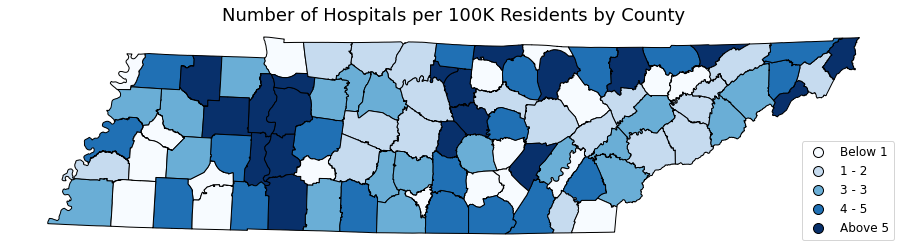

In [137]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'num_hospitals_per_100k', 
              edgecolor = 'black',
              legend = True,
              cmap = 'Blues',
              scheme="Quantiles",
              ax = ax,
              # missing_kwds={
              # "color": "lightgrey",
              # "edgecolor": "grey",
              # "label": "Missing values",
              # },
              # classification_kwds ={k : 10}
)

leg = ax.get_legend()

# Adjust the formatting of the legend
labels = []
n = len(leg.get_texts())
for i, lbl in enumerate(leg.get_texts()):
    label_text = lbl.get_text()
    if label_text == 'Missing values': 
        labels.append(label_text)
        continue
    lower = float(label_text.split()[0][:-1])
    upper = float(label_text.split()[1][:-1])
    if i == 0:
        new_text = "Below " + "{:,.0f}".format(upper + 1)
    elif i == n - 1:
        new_text = "Above " + "{:,.0f}".format(lower)
    else:
        new_text = "{:,.0f}".format(lower + 1) + " - " + "{:,.0f}".format(upper)
        
    labels.append(new_text)

# Adjust the marker appearance
# Extract the old markers and then modify by setting the edgecolor and edgewidth
markers = []
for line in leg.get_lines():
    marker = Line2D([0],[0], marker = 'o', 
                    markersize = line.get_markersize(), 
                    color = line.get_markerfacecolor(),
                    linestyle = 'None',
                    markeredgecolor = 'black',
                    markeredgewidth = 1)
    markers.append(marker)

# Redraw the legend with the new labels and markers
plt.legend(markers, labels, fontsize = 12)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
    
plt.title('Number of Hospitals per 100K Residents by County', fontsize = 18)

ax.axis('off');

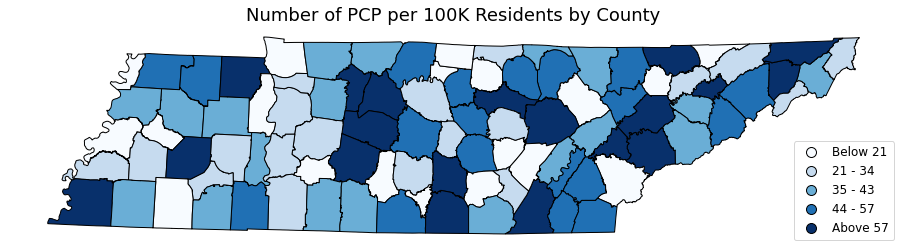

In [139]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'pcp_per_100k', 
              edgecolor = 'black',
              legend = True,
              cmap = 'Blues',
              scheme="Quantiles",
              ax = ax,
              # missing_kwds={
              # "color": "lightgrey",
              # "edgecolor": "grey",
              # "label": "Missing values",
              # },
              # classification_kwds ={k : 10}
)

leg = ax.get_legend()

# Adjust the formatting of the legend
labels = []
n = len(leg.get_texts())
for i, lbl in enumerate(leg.get_texts()):
    label_text = lbl.get_text()
    if label_text == 'Missing values': 
        labels.append(label_text)
        continue
    lower = float(label_text.split()[0][:-1])
    upper = float(label_text.split()[1][:-1])
    if i == 0:
        new_text = "Below " + "{:,.0f}".format(upper + 1)
    elif i == n - 1:
        new_text = "Above " + "{:,.0f}".format(lower)
    else:
        new_text = "{:,.0f}".format(lower + 1) + " - " + "{:,.0f}".format(upper)
        
    labels.append(new_text)

# Adjust the marker appearance
# Extract the old markers and then modify by setting the edgecolor and edgewidth
markers = []
for line in leg.get_lines():
    marker = Line2D([0],[0], marker = 'o', 
                    markersize = line.get_markersize(), 
                    color = line.get_markerfacecolor(),
                    linestyle = 'None',
                    markeredgecolor = 'black',
                    markeredgewidth = 1)
    markers.append(marker)

# Redraw the legend with the new labels and markers
plt.legend(markers, labels, fontsize = 12)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
    
plt.title('Number of PCP per 100K Residents by County', fontsize = 18)

ax.axis('off');

<AxesSubplot:xlabel='Median Household Income', ylabel='num_beds'>

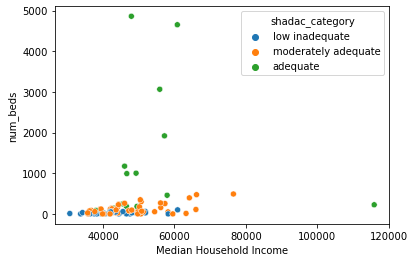

In [82]:
sns.scatterplot(data = counties, x = 'Median Household Income', y = 'num_beds', hue = 'shadac_category')

In [127]:
counties['num_hospitals_per_100k']=counties.num_hospitals_open/counties.population*100000

<AxesSubplot:xlabel='Median Household Income', ylabel='num_hospitals_open'>

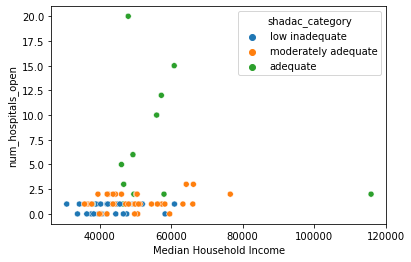

In [129]:
sns.scatterplot(data = counties, x = 'Median Household Income', y = 'num_hospitals_open', hue = 'shadac_category')

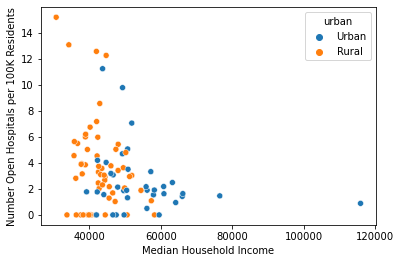

In [132]:
sns.scatterplot(data = counties, x = 'Median Household Income', y = 'num_hospitals_per_100k', hue = 'urban')
plt.ylabel("Number Open Hospitals per 100K Residents")
plt.savefig('income_vs_hosp_urban.pdf')

In [84]:
disparities.sort_values(['pcp_per_100k','population'], ascending = [True,False])[['county', 'num_beds','num_hospitals','pcp_per_100k','population']][0:25]

,county,num_beds,num_hospitals,pcp_per_100k,population
FIPS,,,,,
47033,Crockett,0.0,0.0,0.000000,14399
47061,Grundy,0.0,0.0,0.000000,13344
47095,Lake,0.0,0.0,0.000000,7401
47175,Van Buren,0.0,0.0,0.000000,5760
47007,Bledsoe,25.0,1.0,6.740361,14836
47161,Stewart,0.0,0.0,7.447680,13427
47097,Lauderdale,25.0,1.0,7.695564,25989
47129,Morgan,0.0,0.0,13.924344,21545
47117,Marshall,25.0,1.0,15.167602,32965


### What happens if we add a few hospitals in TN?

<AxesSubplot:xlabel='num_hospitals_open', ylabel='Density'>

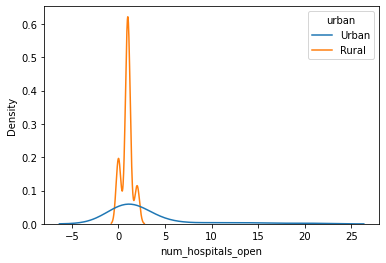

In [85]:
sns.kdeplot(disparities.num_hospitals_open, hue = disparities.urban)

In [86]:
predict = disparities.copy()

In [87]:
disparities.sort_values(['num_hospitals_open','pcp_per_100k'])[0:1]

,year,primary_sex,primary_age,primary_dual,state,primary_race,primary_eligibility,primary_denominator_well,analysis_value_well,primary_denominator_hosp,...,county,primary_care_physicians,population,urban,shadac_category,pcp_per_100k,num_hospitals,num_hospitals_open,mean_beds,num_beds
FIPS,,,,,,,,,,,,,,,,,,,,,
47033,2019,All,All,Dual & non-dual,TENNESSEE,All,All,"1,000-4,999",25,"1,000-4,999",...,Crockett,0.0,14399,Rural,low inadequate,0.0,0.0,0.0,NaN,0.0


In [88]:
import numpy as np
def add_hospitals_weak_link(data, category, num_hospitals = 5, return_mean = False, print_bool = True):
    df = data.copy()
    sorted_df = df.sort_values([category,'population'], ascending = [True, False])
    # print(sorted_df.head(3))
    worst = sorted_df.index[0]
    df.loc[worst,'num_hospitals_open'] = num_hospitals
    # df['num_hospitals_open_per_100k'] = df.num_hospitals_open*100000/df.population
    if print_bool ==True:
        print("Baseline mean number of open hospitals per 100k before adding hospitals: "+str(np.round(data['num_hospitals_open'].mean(),4)))

        print(f"Mean number of open hospitals per 100k after adding {num_hospitals} hospitals to {df.loc[worst,'county']} County: "
          +str(np.round(df['num_hospitals_open'].mean(), 4)))
    return df['num_hospitals_open'].mean() if return_mean ==True else None

add_hospitals_weak_link(disparities, category = 'pcp_per_100k')

Baseline mean number of open hospitals per 100k before adding hospitals: 1.6421
Mean number of open hospitals per 100k after adding 5 hospitals to Crockett County: 1.6947


In [89]:
import numpy as np
def add_hospitals_equitably(data, category, num_hospitals = 5, num_counties = 5, copy = False, print_bool = True, return_mean = False):
    df = data.copy()
    sorted_df = df.sort_values([category,'population'], ascending = [True, False])
    # print(sorted_df.head(3))
    worst = sorted_df.index[0:num_counties]
    for i in worst:
        df.loc[i,'num_hospitals_open'] = num_hospitals/num_counties
    # df['num_hospitals_open'] = df.num_hospitals_open*100000/df.population
    if print_bool == True:
        print("Baseline mean number of open hospitals per 100k before adding hospitals: "+str(np.round(data['num_hospitals_open'].mean(), 4)))

        print(f"Mean number of open hospitals per 100k after adding {num_hospitals} hospitals to {df.loc[worst,'county'].values} Counties: "
          +str(np.round(df['num_hospitals_open'].mean(), 4)))
    return df['num_hospitals_open'].mean() if return_mean == True else None

add_hospitals_equitably(disparities, category = 'pcp_per_100k')

Baseline mean number of open hospitals per 100k before adding hospitals: 1.6421
Mean number of open hospitals per 100k after adding 5 hospitals to ['Crockett' 'Grundy' 'Lake' 'Van Buren' 'Bledsoe'] Counties: 1.6842


In [90]:
add_hospitals_weak_link(disparities, category = 'pcp_per_100k', num_hospitals=10)
add_hospitals_equitably(disparities, category = 'pcp_per_100k', num_hospitals=10)

Baseline mean number of open hospitals per 100k before adding hospitals: 1.6421
Mean number of open hospitals per 100k after adding 10 hospitals to Crockett County: 1.7474
Baseline mean number of open hospitals per 100k before adding hospitals: 1.6421
Mean number of open hospitals per 100k after adding 10 hospitals to ['Crockett' 'Grundy' 'Lake' 'Van Buren' 'Bledsoe'] Counties: 1.7368


In [91]:
means_weak = []
means_equit = []
for i in range(20):
    means_weak.append(add_hospitals_weak_link(disparities, category='pcp_per_100k', num_hospitals=i, print_bool=False, return_mean = True))
    means_equit.append(add_hospitals_equitably(disparities, category='pcp_per_100k', num_hospitals=i,num_counties=4, print_bool=False, return_mean = True))

print(means_weak)
print(means_equit)


[1.6421052631578947, 1.6526315789473685, 1.6631578947368422, 1.6736842105263159, 1.6842105263157894, 1.694736842105263, 1.7052631578947368, 1.7157894736842105, 1.7263157894736842, 1.736842105263158, 1.7473684210526317, 1.7578947368421052, 1.768421052631579, 1.7789473684210526, 1.7894736842105263, 1.8, 1.8105263157894738, 1.8210526315789475, 1.831578947368421, 1.8421052631578947]
[1.6421052631578947, 1.6526315789473685, 1.6631578947368422, 1.6736842105263159, 1.6842105263157894, 1.694736842105263, 1.7052631578947368, 1.7157894736842105, 1.7263157894736842, 1.736842105263158, 1.7473684210526317, 1.7578947368421052, 1.768421052631579, 1.7789473684210526, 1.7894736842105263, 1.8, 1.8105263157894738, 1.8210526315789475, 1.831578947368421, 1.8421052631578947]


# Question 2: What is the relationship between areas without access and ER visits?
Do areas that lack access to healthcare tend to have higher rates of emergency department visits or hospitalizations? Is there an association between the percentage of beneficiaries who had an annual wellness visit and rate of hospitalizations or emergency department visits?



Reordering `disparities` in order of least acess:

In [92]:
disparities = disparities.sort_values(['pcp_per_100k','population'], ascending = [True,False]).reset_index()

In [93]:
disparities.columns

Index(['FIPS', 'year', 'primary_sex', 'primary_age', 'primary_dual', 'state',
       'primary_race', 'primary_eligibility', 'primary_denominator_well',
       'analysis_value_well', 'primary_denominator_hosp',
       'analysis_value_hosp', 'primary_denominator_emer',
       'analysis_value_emer', 'laus_code', 'Name', 'Employed', 'Unemployed',
       'unemployment_rate', 'FIPS.1', 'county', 'primary_care_physicians',
       'population', 'urban', 'shadac_category', 'pcp_per_100k',
       'num_hospitals', 'num_hospitals_open', 'mean_beds', 'num_beds'],
      dtype='object')

Text(0.5, 0, 'PCP per 100k')

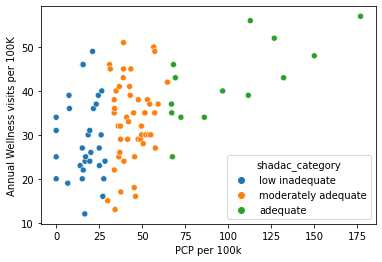

In [ ]:
from imp import reload
reload(plt)
plt.figure()
sns.scatterplot(x = disparities., y = disparities.analysis_value_well, hue = disparities.shadac_category)
plt.ylabel("Emergency department visits per 100K")
plt.xlabel("PCP per 100k")


Text(0.5, 0, 'Median Household Income')

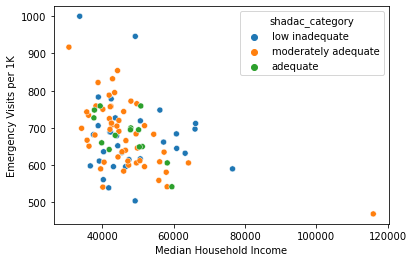

In [154]:
plt.figure()
sns.scatterplot(x = counties['Median Household Income'], y = counties.analysis_value_emer, hue = disparities.shadac_category)
plt.ylabel("Emergency Visits per 1K")
plt.xlabel("Median Household Income")


Text(0, 0.5, 'Hospitalizations per 1K')

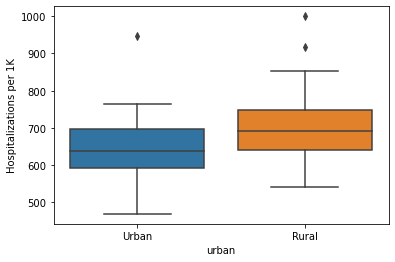

In [150]:
sns.boxplot(x = counties.urban, y = counties.analysis_value_emer)
plt.ylabel("Hospitalizations per 1K")


## Association between the percentage of beneficiaries who had an annual wellness visit and rate of hospitalizations or emergency department visits

Text(0.5, 21.70625000000002, 'Percentage annual wellness visits')

<Figure size 432x288 with 0 Axes>

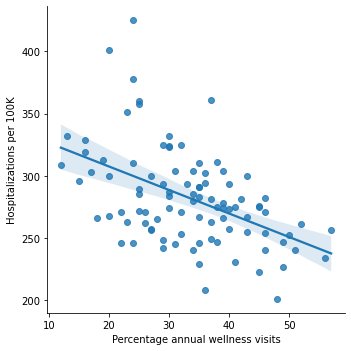

In [124]:
plt.figure()
sns.lmplot(data =disparities, y = "analysis_value_hosp", x = "analysis_value_well")
plt.ylabel("Hospitalizations per 100K")
plt.xlabel("Percentage annual wellness visits")


In [103]:
emer_per_100k =disparities.analysis_value_emer
hosp_per_100k =disparities.analysis_value_hosp
well_rate = disparities.analysis_value_well

In [155]:
rates = pd.DataFrame([emer_per_100k, hosp_per_100k, well_rate, disparities.pcp_per_100k, disparities.shadac_category,counties['Median Household Income']], index=['Emergency Visits','Hospitalizations','Wellness Visits', 'pcp', 'shadac', 'Income']).T

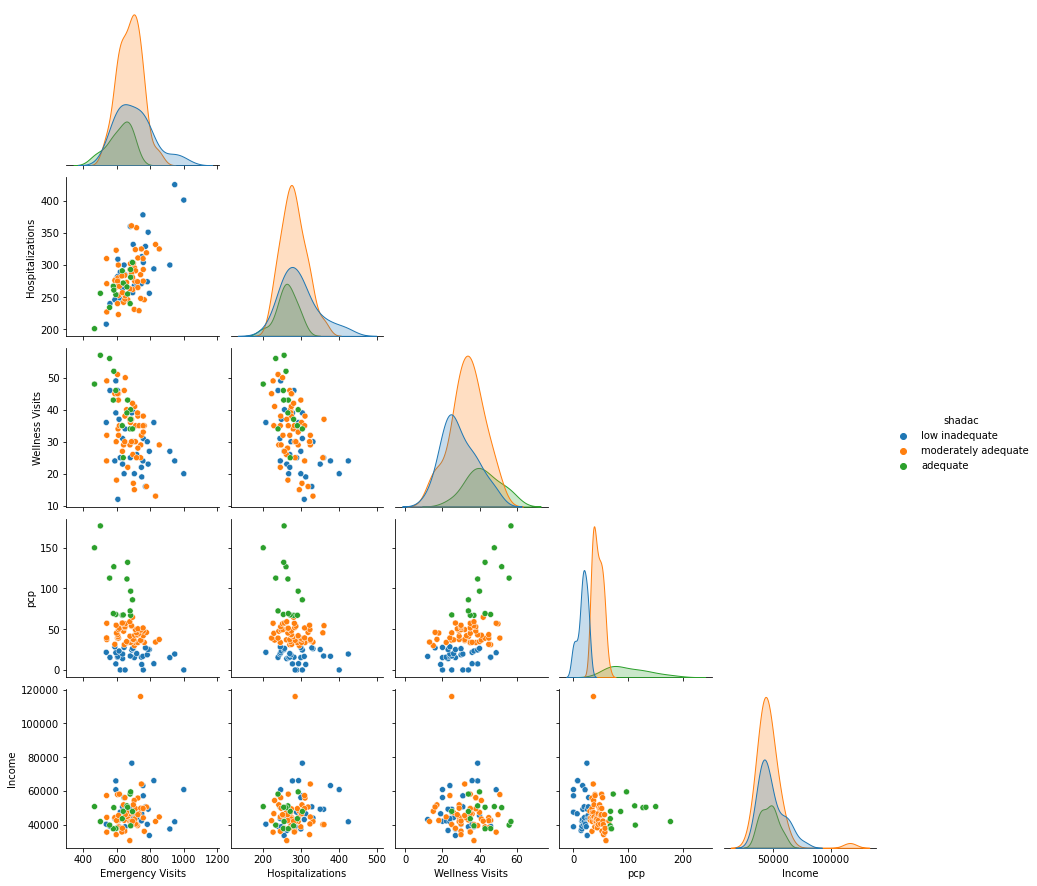

In [156]:
sns.pairplot(rates, hue = 'shadac', corner = True)

In [114]:
rates[['emer','hosp','well', 'pcp']] = rates[['emer','hosp','well', 'pcp']].astype(float)

In [158]:
rates.drop('shadac', axis = 1)

,Emergency Visits,Hospitalizations,Wellness Visits,pcp,Income
0,622,289,25,0.0,47508
1,651,285,34,0.0,38879
2,1000,401,20,0.0,60874
3,759,304,31,0.0,57196
4,750,313,19,6.740361,46565
...,...,...,...,...,...
90,559,234,56,112.772823,39859
91,584,261,52,126.711238,50201
92,666,255,43,132.138284,50427
93,469,201,48,149.962953,50819


In [165]:
rates.drop('shadac', axis = 1).astype(float).corr().style.background_gradient('coolwarm')



,Emergency Visits,Hospitalizations,Wellness Visits,pcp,Income
Emergency Visits,1.000000,0.599412,-0.480607,-0.396181,0.153085
Hospitalizations,0.599412,1.000000,-0.480732,-0.308934,0.126632
Wellness Visits,-0.480607,-0.480732,1.000000,0.488941,-0.073377
pcp,-0.396181,-0.308934,0.488941,1.000000,-0.080277
Income,0.153085,0.126632,-0.073377,-0.080277,1.000000


In [166]:
counties.to_csv('../data/counties_full.csv')

In [118]:
disparities.to_csv('../data/disparities.csv')

# Question 3: Which subpopulations need more attention?
Finally, TN Med Helper is trying to identify specific subpopulations to focus more attention on. Using data from the Behavioral Risk Factor Surveillance System, build a model to predict whether an individual has not had a checkup in the last year. Apply this model to the counties you identified above to predict how likely it is that the average person from those counties has not had a checkup in the last year. Which groups within these counties might need to be focused on to maximize the impact of TN Med Helper's efforts?